In [1]:
import os
import time

import numpy as np
import ipyvolume as ipv
from pathlib import Path

from tyssue import Sheet, config
from tyssue.io import hdf5
from tyssue.draw.ipv_draw import view_ipv
from tyssue.draw.ipv_draw import sheet_view as ipv_sheet_view
from tyssue.draw.ipv_draw import view_ipv
from tyssue.core.sheet import get_opposite
from tyssue.draw.plt_draw import quick_edge_draw,sheet_view

from invagination.toolbox import (open_sheet,
                                 define_depth)

import matplotlib.pyplot as plt
%matplotlib inline

SIM_DIR = Path('/home/admin-suz/Documents/Simulations/Ablations/2018-12-07_TEST1_AblatedProbability')
#SIM_DIR = Path('/home/admin-suz/Documents/Simulations/Surface_tension/2018-11-28')

#SIM_DIR = Path('/media/admin-suz/Sophie/SimulationsReview/2018-08-22_TEST5')
#SIM_DIR = Path('/media/admin-suz/Sophie/2018/datas/Simulations/2018-05-29_principal_results/')

old = None

In [2]:
import datetime
today = datetime.date.today()
dirname = SIM_DIR/f'{today.isoformat()}'


dirname = SIM_DIR/'1.08_contractility_5_critical_area_30_radialtension_1/'

## 3D view

In [4]:
from tyssue.draw import sheet_view

import ipyvolume.pylab as p3
hfs = [f  for f in os.listdir(dirname)
       if f.endswith('hf5')]
hfs.sort(key=lambda x: os.path.getctime(os.path.join(dirname, x)))

current = 'invagination_0050.hf5'
ipv.clear()
ipv.style.use('dark')


dsets = hdf5.load_datasets(os.path.join(dirname, current),
                               data_names=['vert', 'edge', 'face', 'cell'])

specs = config.geometry.cylindrical_sheet()
sheet = Sheet('ellipse', dsets, specs)

#sheet = sheet.extract_bounding_box(z_boundary=[-200,50])
def draw_specs(sheet):
    specs = {
        'edge': {
            'visible': True,
            'color': sheet.vert_df.y
        },
        'face': {
            'visible': True,
            'color': sheet.face_df.area,
            'colormap': 'Blues'
        }
    }
    return specs

ipv.clear()
ipv_fig, meshes = sheet_view(sheet, coords=list('zxy'),
                             mode='3D', **draw_specs(sheet))
ipv_fig

Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], meshes=[Mesh(color=array([[0.269308, 0.218818, 0.509577],
       [0.678489, 0.863742, 0.189503],
       [0.28229 , 0.145912, 0.46151 ],
       ...,
       [0.12138 , 0.629492, 0.531973],
       [0.804182, 0.882046, 0.114965],
       [0.175707, 0.6979  , 0.491033]]), lines=array([[11748, 11825],
       [11281, 11598],
       [ 7579,  7580],
       ...,
       [ 4910,  4908],
       [ 8940,  8946],
       [    0,  1365]], dtype=uint32), texture=None, x=array([ 93.07807903, -72.35277271,  91.01562422, ..., 122.58556534,
        59.6574815 , -91.77399728]), y=array([-33.34036758, -39.95808465,  -2.85260098, ...,  47.91244988,
       -33.23583511, -63.16328433]), z=array([-57.91456888,  63.03337286, -67.6772391 , ...,  10.75844945,
        70.69453841,  23.52704181])), Mesh(color=array([[0.82592849, 0.89179546, 0.95374087],
       [0.83478662, 0.89770088, 0.95669358],
       [0.82297578, 0.88982699, 0.95275663],
       ...,
       [0.81707036, 0.88589004, 0.95078816],
       [0.81707036, 0.88589004, 0.95078816],
       [0.82592849, 0.89179546, 0.95374087]]), texture=None, triangles=array([[ 5786,  5938, 41554],
       [ 5801,  5939, 41555],
       [ 4718,  5940, 41556],
       ...,
       [ 3647, 41551, 77167],
       [ 1467, 41552, 77168],
       [    0, 41553, 77169]], dtype=uint32), x=array([ 89.8775739 ,  95.12355072,  94.50860586, ..., -30.43842496,
       -79.50953833,  92.22417699]), y=array([-34.20008731, -34.8980384 , -30.58904206, ...,  82.90472891,
       -37.70556365, -35.79928478]), z=array([-58.96692131, -55.81893797, -58.60965867, ...,   9.44765587,
       -61.63710066, -56.87231702]))], style={'axes': {'visible': False, 'label': {'color': 'white'}, 'ticklabel': {'color': 'white'}, 'color': 'white'}, 'box': {'visible': False}, 'background-color': 'black'}, tf=None, width=400, xlim=[-164.90213258360527, 164.94857894259516], ylim=[-164.90213258360527, 164.94857894259516], zlim=[-164.90213258360527, 164.94857894259516])

In [155]:
import ipyvolume.pylab as p3
hfs = [f  for f in os.listdir(dirname)
       if f.endswith('hf5')]
hfs.sort(key=lambda x: os.path.getctime(os.path.join(dirname, x)))

current = 'invagination_0004.hf5'
ipv.clear()
ipv.style.use('dark')


dsets = hdf5.load_datasets(os.path.join(dirname, current),
                               data_names=['vert', 'edge', 'face', 'cell'])

specs = config.geometry.cylindrical_sheet()
#sheet = Sheet('ellipse', dsets, specs)
sheet.face_df['visible']=True


def draw_specs(sheet):
    specs = {
        'edge': {
            'visible': True,
            'color': sheet.vert_df.y
        },
        'face': {
            'visible': True,
            'color': sheet.face_df.area,
            'colormap': 'Blues'
        }
    }
    return specs

ipv.clear()
ipv_fig, meshes = sheet_view(sheet, coords=list('zxy'),
                             mode='3D', **draw_specs(sheet))
ipv_fig

Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], meshes=[Mesh(color=array([[0.274128, 0.199721, 0.498911],
       [0.525776, 0.833491, 0.288127],
       [0.283072, 0.130895, 0.449241],
       ...,
       [0.636902, 0.856542, 0.21662 ],
       [0.143303, 0.669459, 0.511215],
       [0.225863, 0.330805, 0.547314]]), lines=array([[11751, 11828],
       [11284, 11601],
       [ 7582,  7583],
       ...,
       [ 4911,  4909],
       [ 8943,  8949],
       [    0,  1365]], dtype=uint32), texture=None, x=array([ 87.68871641, -77.18593233,  85.64211472, ...,  68.68169356,
        62.57401999,  -8.91570188]), y=array([-33.2755013 , -48.64049789,  -2.78960047, ..., -43.97901986,
        75.11800301,  74.5261798 ]), z=array([-59.94686939,  54.50800087, -69.36945998, ...,  61.66890054,
        18.79361377, -40.97765817])), Mesh(color=array([[0.5545098 , 0.75641676, 0.86831219],
       [0.60470588, 0.78397539, 0.87913879],
       [0.53568627, 0.74608228, 0.86425221],
       ...,
       [0.54196078, 0.7495271 , 0.86560554],
       [0.49803922, 0.7254133 , 0.85613226],
       [0.5545098 , 0.75641676, 0.86831219]]), texture=None, triangles=array([[ 5787,  5939, 41561],
       [ 5802,  5940, 41562],
       [ 4719,  5941, 41563],
       ...,
       [ 3648, 41558, 77180],
       [ 1467, 41559, 77181],
       [    0, 41560, 77182]], dtype=uint32), x=array([ 84.64640528,  89.6963893 ,  89.04376202, ..., -29.33477224,
       -74.52133508,  86.90160988]), y=array([-34.21789097, -34.76526378, -30.48496148, ...,  83.31232595,
       -37.71524216, -35.77601563]), z=array([-60.89118132, -57.89284366, -60.5856125 , ...,   6.37395673,
       -63.5925856 , -58.89832456]))], style={'axes': {'visible': False, 'label': {'color': 'white'}, 'ticklabel': {'color': 'white'}, 'color': 'white'}, 'box': {'visible': False}, 'background-color': 'black'}, tf=None, width=400, xlim=[-164.90213258360527, 164.94857894259516], ylim=[-164.90213258360527, 164.94857894259516], zlim=[-164.90213258360527, 164.94857894259516])

In [156]:
import ipyvolume.pylab as p3
hfs = [f  for f in os.listdir(dirname)
       if f.endswith('hf5')]
hfs.sort(key=lambda x: os.path.getctime(os.path.join(dirname, x)))

current = 'invagination_0004.hf5'
ipv.clear()
ipv.style.use('dark')



dsets = hdf5.load_datasets(os.path.join(dirname, current),
                               data_names=['vert', 'edge', 'face', 'cell'])

specs = config.geometry.cylindrical_sheet()
sheet = Sheet('ellipse', dsets, specs)

datasets={}
datasets['face'] = sheet.face_df[sheet.face_df['contractility']>=0.5].copy()

datasets['edge'] = sheet.edge_df[sheet.edge_df['face'].isin(
                    datasets['face'].index)].copy()
datasets['vert'] = sheet.vert_df.loc[sheet.edge_df['srce'].unique()].copy()

sheet = Sheet('subsheet', datasets, sheet.specs)
sheet.reset_index()
sheet.reset_topo()

sheet = sheet.extract_bounding_box(x_boundary=(-50,200), y_boundary=(-50,200))


"""mean_area = sheet.face_df[~sheet.face_df['is_mesoderm']].area.mean()
rel_area = (sheet.face_df['area'] / mean_area)"""

mean_area = sheet.face_df.height.mean()
rel_area = 1/(sheet.face_df['height'] / mean_area)

mean_edge = sheet.edge_df.cell.mean()
rel_edge = (sheet.edge_df['cell'] / mean_edge)

face_spec = {'color': rel_area, 
             'color_range': (0.8, 1.8),
             'visible': True,
             'epsilon': 0.1,
            'colormap':'Greens'}

edge_spec = {'color':rel_edge,
            'visible':True,
            'espilon':0.1,
            'colormap':'magma'
            }

fig, meshes = ipv_sheet_view(sheet, mode='3D', face=face_spec, edge=edge_spec)


fig.anglex = -1.3
fig.angley = 0.7
fig.anglez = 0.7
ipv.show()


/home/admin-suz/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: RuntimeWarning: invalid value encountered in reduce
  return getattr(obj, method)(*args, **kwds)
/home/admin-suz/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/home/admin-suz/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


VBox(children=(Figure(anglex=-1.3, angley=0.7, anglez=0.7, camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], meshes=[Mesh(color=array([[0.001462, 0.000466, 0.013866],
       [0.001462, 0.000466, 0.013866],
       [0.001462, 0.000466, 0.013866],
       ...,
       [0.001462, 0.000466, 0.013866],
       [0.001462, 0.000466, 0.013866],
       [0.001462, 0.000466, 0.013866]]), lines=array([[    0,  2353],
       [    1,    64],
       [    2,   212],
       ...,
       [11873,  2159],
       [11872, 11873],
       [11859, 11872]], dtype=uint32), texture=None, x=array([ 51.66265011, -38.69842781, -12.82562862, ...,  84.0269613 ,
        83.31232595,  82.80070334]), y=array([16.06460012, 72.37501475, 82.75344333, ...,  4.82577847,
        6.37395673,  8.73395329]), z=array([114.88837981, -40.28102536,  27.67113512, ..., -23.33273845,
       -29.33477224, -31.83888966])), Mesh(color=array([[0.83852364, 0.93697809, 0.8149481 ],
       [0.83852364, 0.93697809, 0.8149481 ],
       [0.82745098, 0.93254902, 0.80313725],
       ...,
       [0.83852364, 0.93697809, 0.8149481 ],
       [0.83852364, 0.93697809, 0.8149481 ],
       [0.83852364, 0.93697809, 0.8149481 ]]), texture=None, triangles=array([[ 3335,  3429, 23995],
       [ 3347,  3430, 23996],
       [ 2639,  3431, 23997],
       ...,
       [ 1975, 23992, 44558],
       [ 1975, 23993, 44559],
       [ 1975, 23994, 44560]], dtype=uint32), x=array([-47.92961972, -46.11437239, -47.48865645, ...,  82.45274792,
        82.81357683,  83.27403718]), y=array([ 53.56573234,  56.42000413, -48.1595527 , ...,  12.04750857,
         8.85089402,   6.72689712]), z=array([-80.42159742, -77.5779057 ,  89.74433993, ..., -31.19937845,
       -31.58079726, -29.32709159]))], style={'axes': {'visible': False, 'label': {'color': 'white'}, 'ticklabel': {'color': 'white'}, 'color': 'white'}, 'box': {'visible': False}, 'background-color': 'black'}, tf=None, width=400, xlim=[-164.90213258360527, 164.94857894259516], ylim=[-164.90213258360527, 164.94857894259516], zlim=[-164.90213258360527, 164.94857894259516]),))

## Ventral view of cells at the beginning

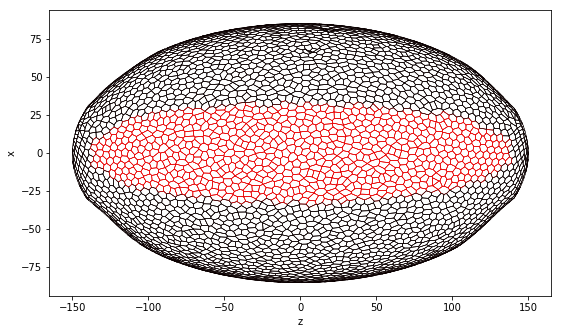

In [4]:
draw_specs = config.draw.sheet_spec()
sheet = open_sheet(dirname, 1)
sheet = sheet.extract_bounding_box(y_boundary=[0, 100])
fig, ax = plt.subplots()
edge_mask = 'is_mesoderm'
edge_mask_color_map='hot'
coords=['z', 'x']

list_edge_in_mesoderm = sheet.edge_df['face'].isin(
    sheet.face_df[sheet.face_df[edge_mask]].index)

cmap_edge = np.ones(sheet.edge_df.shape[0]) * list_edge_in_mesoderm/4
sheet.edge_df['col'] = cmap_edge / (max(cmap_edge))/4

cmap_edge = plt.cm.get_cmap(edge_mask_color_map, 4)
edge_color_cmap = cmap_edge(sheet.edge_df.col)
draw_specs['edge']['color'] = edge_color_cmap

draw_specs['edge']['visible'] = True
draw_specs['edge']['alpha'] = 0.7
draw_specs['vert']['visible'] = False
draw_specs['face']['visible'] = False
draw_specs['face']['alpha'] = 0.6

fig, ax = sheet_view(sheet, coords=coords, ax=ax, **draw_specs)
ax.set_xlabel(coords[0])
ax.set_ylabel(coords[1])

fig.set_size_inches(9.25, 5.25, forward=True)


ax.grid(False)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
#ax.axis('off')

/home/admin-suz/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


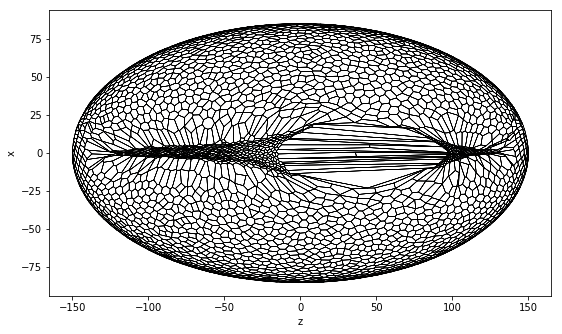

In [15]:
draw_specs = config.draw.sheet_spec()
sheet = open_sheet(dirname, 50)
sheet = sheet.extract_bounding_box(y_boundary=[0, 100])
fig, ax = plt.subplots()
edge_mask_color_map='gist_gray'
coords=['z', 'x']

list_cutting_edge = sheet.edge_df['face'].isin(
    sheet.face_df[sheet.face_df['contractility']<0.01].index)

cmap_edge = np.ones(sheet.edge_df.shape[0]) * list_cutting_edge
sheet.edge_df['col'] = cmap_edge / (max(cmap_edge))

cmap_edge = plt.cm.get_cmap(edge_mask_color_map, 2)
edge_color_cmap = cmap_edge(sheet.edge_df.col)
draw_specs['edge']['color'] = edge_color_cmap

draw_specs['edge']['visible'] = True
draw_specs['edge']['alpha'] = 1
draw_specs['vert']['visible'] = False
draw_specs['face']['visible'] = False
draw_specs['face']['alpha'] = 0.6

fig, ax = sheet_view(sheet, coords=coords, ax=ax, **draw_specs)
ax.set_xlabel(coords[0])
ax.set_ylabel(coords[1])

fig.set_size_inches(9.25, 5.25, forward=True)


ax.grid(False)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
#ax.axis('off')
#fig.savefig('../post_ablation.png', dpi = 150)

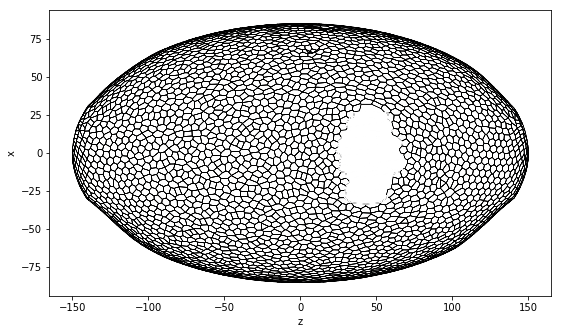

In [31]:
SIM_DIR = Path('/home/admin-suz/Documents/short_simulation/file_to_copy/2018-09-08_TEST3')
dirname = SIM_DIR/'1.08_contractility_5_critical_area_30_radialtension_0/'

draw_specs = config.draw.sheet_spec()
sheet = open_sheet(dirname, 1)
sheet = sheet.extract_bounding_box(y_boundary=[0, 150])
fig, ax = plt.subplots()
edge_mask_color_map='gist_gray'
coords=['z', 'x']

list_cutting_edge = sheet.edge_df['face'].isin(
    sheet.face_df[sheet.face_df['contractility']<=0.5].index)

cmap_edge = np.ones(sheet.edge_df.shape[0]) * list_cutting_edge
sheet.edge_df['col'] = cmap_edge / (max(cmap_edge))

cmap_edge = plt.cm.get_cmap(edge_mask_color_map, 2)
edge_color_cmap = cmap_edge(sheet.edge_df.col)
draw_specs['edge']['color'] = edge_color_cmap

draw_specs['edge']['visible'] = True
draw_specs['edge']['alpha'] = 1
draw_specs['vert']['visible'] = False
draw_specs['face']['visible'] = False
draw_specs['face']['alpha'] = 0.6

fig, ax = sheet_view(sheet, coords=coords, ax=ax, **draw_specs)
ax.set_xlabel(coords[0])
ax.set_ylabel(coords[1])

fig.set_size_inches(9.25, 5.25, forward=True)


ax.grid(False)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)

#ax.axis('off')
fig.savefig('../post_ablation.png', dpi = 300)

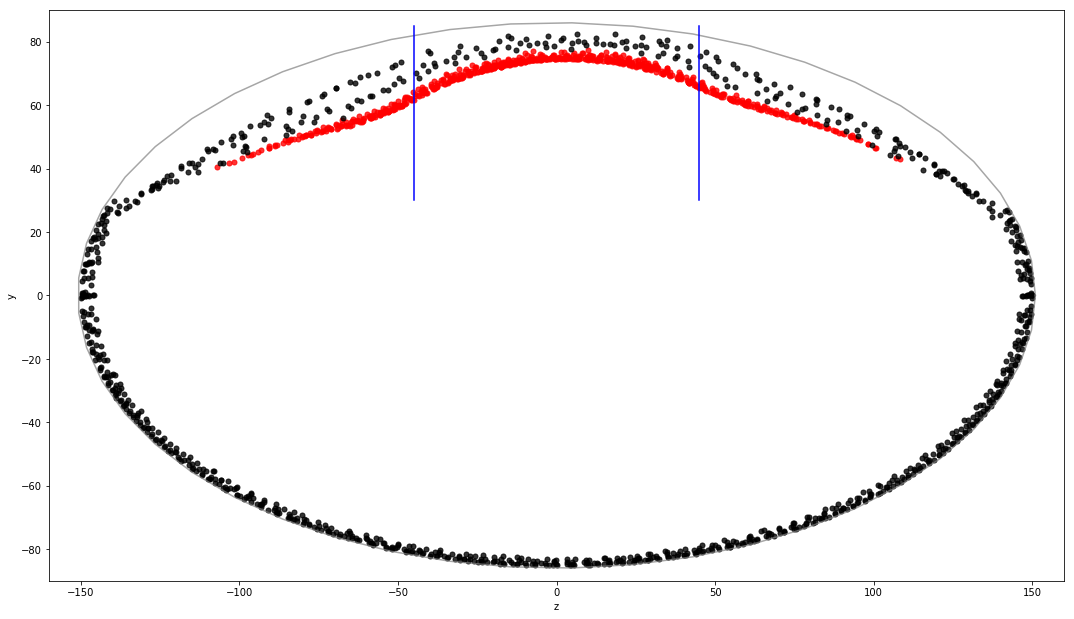

In [5]:
import matplotlib.gridspec as gridspec
SIM_DIR = Path('/home/admin-suz/Documents/Simulations/Ablations/2018-12-07_TEST1_AblatedProbability')
#SIM_DIR = Path('/media/admin-suz/Sophie/2018/Papiers-EMT-Melanie/datas/2018-09-07_TEST1/')
dirname = SIM_DIR/'1.08_contractility_5_critical_area_30_radialtension_1/'
sheet = open_sheet(dirname, 30)
sheet_mesoderm = sheet.extract('is_mesoderm')

sheet_mesoderm = sheet.face_df[(sheet.face_df['contractility']!=0) & 
                              (sheet.face_df['is_mesoderm'])]
sheet_ectoderm = sheet.face_df[(~sheet.face_df['is_mesoderm']) & (sheet.face_df.x>-20)&(sheet.face_df.x<20)]

edge_specs = {'alpha': 0.6,
              'lw': 0.1,
              'color': 'white'}
scatter_specs = {'alpha': 0.8,
                 'ms': 5,
                 'color': 'red'}


#plt.figure(figsize=(18.5, 10.5))
fig, ax = plt.subplots(figsize=(18.5, 10.5))



#Retire visuellement les cellules qui ont été ablaté apicalement
datasets={}
datasets['face'] = sheet.face_df[sheet.face_df['contractility']!=0].copy()

datasets['edge'] = sheet.edge_df[sheet.edge_df['face'].isin(
                    datasets['face'].index)].copy()
datasets['vert'] = sheet.vert_df.loc[sheet.edge_df['srce'].unique()].copy()

sheet = Sheet('subsheet', datasets, sheet.specs)
sheet.reset_index()
sheet.reset_topo()



u, v = ('z', 'y')
fig, ax = quick_edge_draw(sheet.extract_bounding_box(x_boundary=(-5,5)),
                          coords=('z', 'y'),
                          ax = ax,
                          **edge_specs)

ax.plot(sheet_mesoderm[u],
        sheet_mesoderm[v],
        'o', **scatter_specs)
scatter_specs = {'alpha': 0.8,
                 'ms': 5,
                 'color': 'k'}
ax.plot(sheet_ectoderm[u],
        sheet_ectoderm[v],
        'o', **scatter_specs)
"""
sheet_dead = sheet.face_df[sheet.face_df['contractility']!=0]
scatter_specs2 = {'alpha': 1,
                 'ms': 5.5,
                 'color': 'white'}
ax.plot(sheet_dead[u],
        sheet_dead[v],
        'o', **scatter_specs2)
        """


"""sheet = sheet.extract_bounding_box(x_boundary=(-10,10))
res=(sheet.edge_df[(sheet.edge_df.srce.isin(sheet.vert_df[sheet.vert_df.radial_tension==0].index))
                           &
                           (sheet.edge_df.trgt.isin(sheet.vert_df[sheet.vert_df.radial_tension==0].index))])
for f in res.face.unique() : 
    if len(res[res.face==f]) == 1:
        res= res.drop(res[res.face==f].index)
sheet_no_force = sheet.face_df[(sheet.face_df.index.isin(res.face.unique())) & sheet.face_df.is_mesoderm == True]
scatter_specs2 = {'alpha': 1,
                 'ms': 5.5,
                 'color': 'orange'}
ax.plot(sheet_no_force[u],
        sheet_no_force[v],
        'o', **scatter_specs2)"""

ax.set_ylim(-90,90)
ax.set_xlim(-160,160)

ax.set_xlabel(u)
ax.set_ylabel(v)

a = 86
c = 151
thetas = np.linspace(0, 2 * np.pi)
ax.plot(c * np.cos(thetas), a * np.sin(thetas), color='grey', alpha=0.7)

#ax.plot((-45,45), (30,30), color="blue")
ax.plot((-45,-45), (30,85), color= "blue")
ax.plot((45,45), (30,85), color='blue')

#plt.savefig('../TEST5_simul_15_coupe_50.png', dpi = 300)

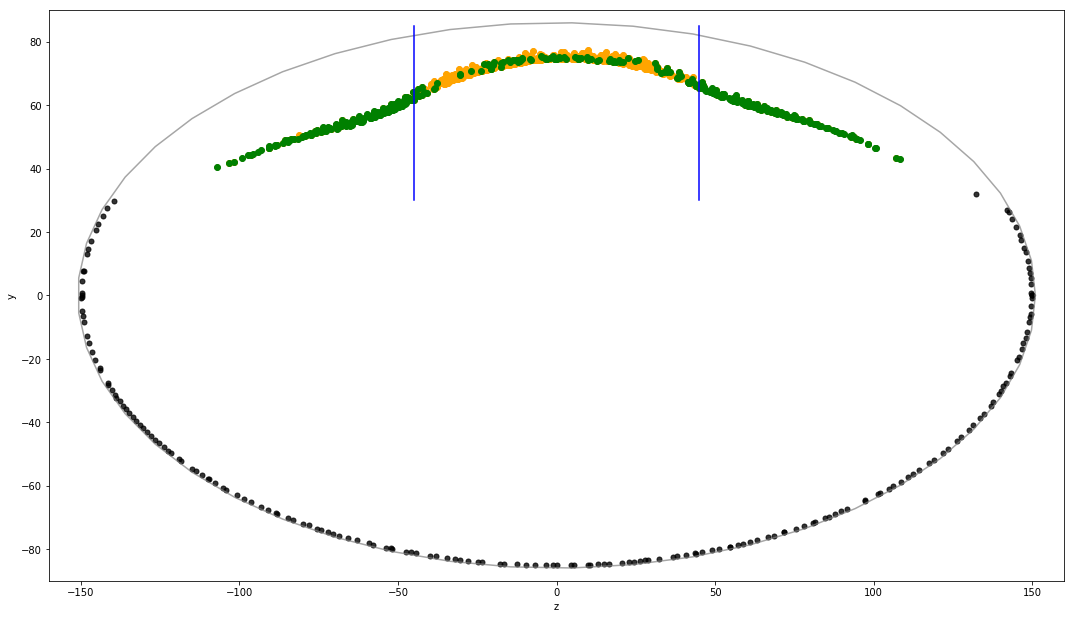

In [60]:
import matplotlib.gridspec as gridspec
#SIM_DIR = Path('/media/admin-suz/Sophie/2018/Papiers-EMT-Melanie/datas/Simulations/Ablations/2018-09-08_TEST3/')
#dirname = SIM_DIR/'1.08_contractility_5_critical_area_30_radialtension_0/'
#sheet = open_sheet(dirname, 50)

sheet_mesoderm = sheet.face_df[(sheet.face_df['is_mesoderm']) & (sheet.face_df.x>-5)&(sheet.face_df.x<5)]
sheet_ectoderm = sheet.face_df[(~sheet.face_df['is_mesoderm']) & (sheet.face_df.x>-5)&(sheet.face_df.x<5)
                              & (sheet.face_df.y>-100)&(sheet.face_df.y<32)]

edge_specs = {'alpha': 0.6,
              'lw': 0.1,
              'color': 'white'}
scatter_specs = {'alpha': 0.8,
                 'ms': 5,
                 'color': 'red'}


#plt.figure(figsize=(18.5, 10.5))
fig, ax = plt.subplots(figsize=(18.5, 10.5))



#Retire visuellement les cellules qui ont été ablaté apicalement
datasets={}
datasets['face'] = sheet.face_df[sheet.face_df['contractility']!=0].copy()

datasets['edge'] = sheet.edge_df[sheet.edge_df['face'].isin(
                    datasets['face'].index)].copy()
datasets['vert'] = sheet.vert_df.loc[sheet.edge_df['srce'].unique()].copy()

sheet = Sheet('subsheet', datasets, sheet.specs)
sheet.reset_index()
sheet.reset_topo()



u, v = ('z', 'y')
fig, ax = quick_edge_draw(sheet.extract_bounding_box(x_boundary=(-10,10)),
                          coords=('z', 'y'),
                          ax = ax,
                          **edge_specs)

ax.plot(sheet_mesoderm[u],
        sheet_mesoderm[v],
        'o', **scatter_specs)
scatter_specs = {'alpha': 0.8,
                 'ms': 5,
                 'color': 'k'}
ax.plot(sheet_ectoderm[u],
        sheet_ectoderm[v],
        'o', **scatter_specs)

ax.set_ylim(-90,90)
ax.set_xlim(-160,160)

ax.set_xlabel(u)
ax.set_ylabel(v)

a = 86
c = 151
thetas = np.linspace(0, 2 * np.pi)
ax.plot(c * np.cos(thetas), a * np.sin(thetas), color='grey', alpha=0.7)


pulling_vert = sheet.vert_df[sheet.vert_df.radial_tension==0].index
pulling_face = sheet.edge_df[sheet.edge_df.srce.isin(pulling_vert)].face.unique()
ax.plot(sheet.face_df[sheet.face_df.index.isin(pulling_face) & sheet.face_df.is_mesoderm].z,
        sheet.face_df[sheet.face_df.index.isin(pulling_face) & sheet.face_df.is_mesoderm].y,
       'o', color='orange')

pulling_vert = sheet.vert_df[sheet.vert_df.radial_tension>0].index
pulling_face = sheet.edge_df[sheet.edge_df.srce.isin(pulling_vert)].face.unique()
ax.plot(sheet.face_df[sheet.face_df.index.isin(pulling_face) & sheet.face_df.is_mesoderm].z,
        sheet.face_df[sheet.face_df.index.isin(pulling_face) & sheet.face_df.is_mesoderm].y,
       'o', color='green')

ax.plot((-45,-45), (30,85), color= "blue")

ax.plot((45,45), (30,85), color='blue')
#plt.savefig('../TEST5_simul_0_coupe_50.png', dpi = 300)